# Mandatory 3
By Carlos Reiakvam

In [59]:
import mandatory_asignments.mandatory3.aco.aco_functions as aco
from random import choices
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Import data

In [60]:
f = open('graph.json')
graph: dict = json.load(f)
f.close()

In [61]:
# graph without weights
gg = {k: {e: w['weight'] for e, w in v.items()} for k, v in graph.items()}

#### 1: generate matrix graph of pheromones

In [70]:
pher_g = {k: {e: 1.0 for e, w in v.items()} for k, v in gg.items()}
pher_g

{'0': {'1': 1.0, '2': 1.0, '3': 1.0, '4': 1.0},
 '1': {'2': 1.0, '5': 1.0, '8': 1.0},
 '2': {'4': 1.0, '5': 1.0, '7': 1.0, '8': 1.0, '9': 1.0, '12': 1.0},
 '3': {'4': 1.0, '6': 1.0, '9': 1.0, '11': 1.0},
 '4': {'5': 1.0, '6': 1.0, '7': 1.0, '9': 1.0, '10': 1.0, '15': 1.0},
 '5': {'6': 1.0, '8': 1.0, '9': 1.0, '10': 1.0, '12': 1.0},
 '6': {'7': 1.0, '8': 1.0, '9': 1.0, '10': 1.0},
 '7': {'8': 1.0,
  '9': 1.0,
  '10': 1.0,
  '11': 1.0,
  '12': 1.0,
  '15': 1.0,
  '17': 1.0},
 '8': {'9': 1.0, '10': 1.0, '11': 1.0, '12': 1.0, '15': 1.0},
 '9': {'10': 1.0, '11': 1.0, '13': 1.0, '15': 1.0, '17': 1.0},
 '10': {'11': 1.0, '12': 1.0, '14': 1.0, '20': 1.0},
 '11': {'12': 1.0, '14': 1.0, '15': 1.0, '18': 1.0, '19': 1.0, '20': 1.0},
 '12': {'15': 1.0},
 '13': {'14': 1.0, '15': 1.0, '18': 1.0, '20': 1.0, '23': 1.0},
 '14': {'16': 1.0, '17': 1.0, '18': 1.0, '20': 1.0, '21': 1.0, '24': 1.0},
 '15': {'16': 1.0, '19': 1.0, '20': 1.0, '22': 1.0},
 '16': {'17': 1.0, '18': 1.0},
 '17': {'18': 1.0, '21': 1

#### 2&3: Let ants travel through node 0 and 29 at random, and keep store of paths

In [63]:
def ant_travel(current_node='0', goal='29'):
    path, nset = [], set()
    while True:
        if current_node == goal:
            return path + [current_node]
        nodes, weights = zip(*[(k, v) for k, v in gg[current_node].items()])

        ch = choices(nodes, weights)[0]

        # avoid ant mill
        if ch not in nset:
            path.append(current_node)
            nset.add(current_node)
            current_node = ch
        else:
            return None

In [64]:
n_ants = 10
ant_paths = [ant_travel() for i in range(n_ants)]

In [65]:
ant_paths

[['0', '3', '4', '9', '15', '19', '24', '26', '28', '29'],
 ['0', '1', '5', '6', '9', '17', '18', '22', '23', '26', '27', '28', '29'],
 ['0',
  '1',
  '5',
  '10',
  '11',
  '12',
  '15',
  '16',
  '18',
  '22',
  '23',
  '24',
  '25',
  '29'],
 ['0', '4', '6', '8', '10', '11', '18', '22', '23', '24', '28', '29'],
 ['0', '1', '5', '6', '9', '10', '20', '25', '27', '28', '29'],
 ['0', '1', '2', '7', '8', '10', '11', '18', '20', '21', '25', '29'],
 ['0',
  '1',
  '2',
  '4',
  '6',
  '7',
  '9',
  '13',
  '15',
  '16',
  '18',
  '22',
  '23',
  '26',
  '28',
  '29'],
 ['0',
  '1',
  '5',
  '6',
  '7',
  '11',
  '12',
  '15',
  '22',
  '23',
  '24',
  '27',
  '28',
  '29'],
 ['0', '2', '12', '15', '16', '18', '22', '23', '24', '25', '26', '28', '29'],
 ['0', '1', '5', '8', '9', '15', '16', '18', '22', '23', '26', '28', '29']]

#### 4: Update pheromone matrix according to the path and its travel cost


In [66]:
def update_pheromone_matrix():
    pher_n = 0.001
    for ap in ant_paths:
        path_cost = 0
        for i in range(len(ap) - 1):
            path_cost += gg[ap[i]][ap[i + 1]]
        pher_to_deposit =  pher_n / path_cost

        for i in range(len(ap) - 1):
            pher_g[ap[i]][ap[i + 1]] += pher_to_deposit

In [67]:
update_pheromone_matrix()

{'0': {'1': 1.025352868767365,
  '2': 1.0039002617735682,
  '3': 1.0070566927238285,
  '4': 1.0045595154494646},
 '1': {'2': 1.0072206723550976, '5': 1.0181321964122674, '8': 1.0},
 '2': {'4': 1.0030861623796983,
  '5': 1.0,
  '7': 1.0041345099753993,
  '8': 1.0,
  '9': 1.0,
  '12': 1.0039002617735682},
 '3': {'4': 1.0070566927238285, '6': 1.0, '9': 1.0, '11': 1.0},
 '4': {'5': 1.0,
  '6': 1.007645677829163,
  '7': 1.0,
  '9': 1.0070566927238285,
  '10': 1.0,
  '15': 1.0},
 '5': {'6': 1.011251638214745,
  '8': 1.003696561282669,
  '9': 1.0,
  '10': 1.0031839969148535,
  '12': 1.0},
 '6': {'7': 1.0065857545012815,
  '8': 1.0045595154494646,
  '9': 1.0077520460931617,
  '10': 1.0},
 '7': {'8': 1.0041345099753993,
  '9': 1.0030861623796983,
  '10': 1.0,
  '11': 1.0034995921215832,
  '12': 1.0,
  '15': 1.0,
  '17': 1.0},
 '8': {'9': 1.003696561282669,
  '10': 1.008694025424864,
  '11': 1.0,
  '12': 1.0,
  '15': 1.0},
 '9': {'10': 1.00396223196746,
  '11': 1.0,
  '13': 1.0030861623796983,
 

#### Step 5: Visualize the results

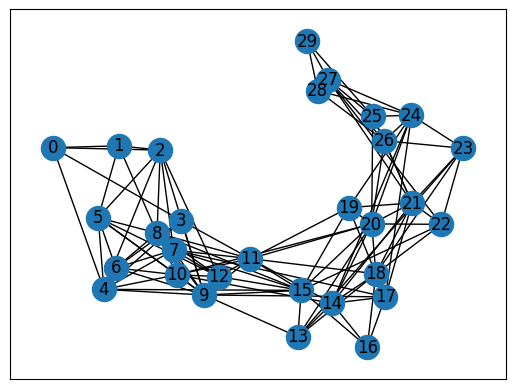

In [68]:
G = nx.from_dict_of_dicts(graph)
# labels = [str(i) for i in range(1,30)]
# nx.set_node_attributes(G, labels, "labels")
dijkstra_p = nx.dijkstra_path(G, '0', '29', weight='weight')

# G.add_nodes_from(labels)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

In [69]:
# path = 0
# for i in range(len(dijkstra_p) - 1):
#     path += gg[dijkstra_p[i]][dijkstra_p[i + 1]]